In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
#encoder dataset
from sklearn.preprocessing import LabelEncoder
#for create model
from sklearn.linear_model import LinearRegression

In [2]:
#print names of files in ML_assignment folder
print(os.listdir())

['.ipynb_checkpoints', 'Assignment2.ipynb', 'Assignment2Final.ipynb', 'data_cleaning.ipynb', 'loan.csv', 'sample', 'Used_car_prices_in_Pakistan 2021_rawD.csv']


In [3]:
#import data-set
df = pd.read_csv("Used_car_prices_in_Pakistan 2021_rawD.csv")

In [4]:
#first five rows
df.head()

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
0,Honda,Insight,NaN,7400000.0,2019,1500,Imported,2000,Un-Registered,Automatic
1,Mitsubishi,Minica,Black Minica,1065000.0,2019,660,Imported,68000,Lahore,Automatic
2,Audi,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,Local,70000,Lahore,Automatic
3,Toyota,Aqua,G,2375000.0,2014,1500,Imported,99900,Islamabad,Automatic
4,Honda,City,1.3 i-VTEC,2600000.0,2017,1300,Local,55000,Islamabad,Manual


In [5]:
#last five rows
df.tail()

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
80567,Suzuki,Bolan,NaN,750000.0,2015,800,Local,98000,Lahore,Manual
80568,Suzuki,Alto,VXR,1480000.0,2020,660,Local,7800,Karachi,Manual
80569,Toyota,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,Local,81000,Islamabad,Automatic
80570,FAW,X-PV,Standard,600000.0,2013,1000,Local,2,Lahore,Manual
80571,Honda,Civic,VTi Prosmatec 1.8 i-VTEC,2620000.0,2013,1800,Imported,100000,Islamabad,Automatic


In [6]:
#shape of the dataset
df.shape

(80572, 10)

# Data Cleaning : Detecting NAN values

In [7]:
#Number of null value
df.isnull().sum()

Make                  0
Model                 0
Version            6772
Price                 0
Make_Year             0
CC                    0
Assembly              0
Mileage               0
Registered City       0
Transmission          0
dtype: int64

# Detecting null values

In [8]:
missing_value=["NaN","Call for price",np.nan]
df = pd.read_csv("Used_car_prices_in_Pakistan 2021_rawD.csv", na_values=missing_value)

In [9]:
df.isnull().any()

Make               False
Model              False
Version             True
Price               True
Make_Year          False
CC                 False
Assembly           False
Mileage            False
Registered City    False
Transmission       False
dtype: bool

In [10]:
#Number of null value
df.isnull().sum()

Make                  0
Model                 0
Version            6772
Price              1209
Make_Year             0
CC                    0
Assembly              0
Mileage               0
Registered City       0
Transmission          0
dtype: int64

In [11]:
# Mean value % in null values
df.isnull().mean()

Make               0.000000
Model              0.000000
Version            0.084049
Price              0.015005
Make_Year          0.000000
CC                 0.000000
Assembly           0.000000
Mileage            0.000000
Registered City    0.000000
Transmission       0.000000
dtype: float64

<AxesSubplot:>

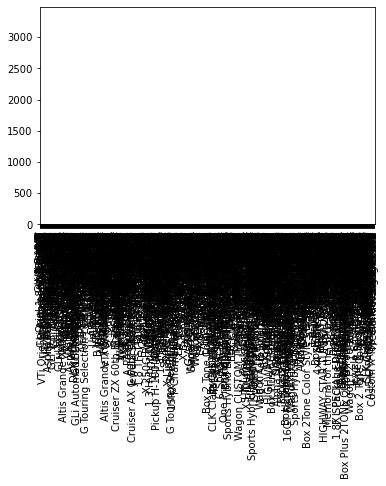

In [12]:
df['Version'].value_counts().plot.bar()

In [ ]:
#display null values using graph
#sns.heatmap(df.isnull(), yticklabels=False, annot=True)

# Add mean value in 'version' variable to the null values

In [25]:
df['Version'].mode()


0    GLi 1.3 VVTi
dtype: object

In [26]:
df['Version'].fillna('GLi 1.3 VVTi', inplace=True)

In [27]:
df['Version'].isnull().sum()

0

In [ ]:
df['Version'].value_counts().plot.bar()

In [23]:
df['Price'].mode()

0    750000.0
dtype: float64

In [24]:
df['Price'].fillna('750000.0', inplace=True)

In [28]:
df['Price'].isnull().sum()

0

<AxesSubplot:>

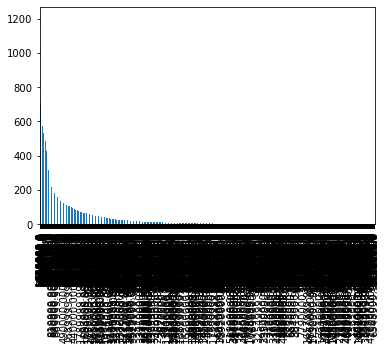

In [29]:
df['Price'].value_counts().plot.bar()

In [30]:
#missing_value=["Call for price",np.nan]
#df = pd.read_csv("Used_car_prices_in_Pakistan 2021_rawD.csv", na_values=missing_value)

In [31]:
#H  df.isnull().any()

In [32]:
#Number of null value
#df.isnull().sum()

In [33]:
# Mean value % in null values
#df.isnull().mean()

In [34]:
#df.dropna()

# Data Preprocessing

# 3.1 LableEncoder

In [35]:
# data types in each colunm
df.dtypes

Make               object
Model              object
Version            object
Price              object
Make_Year           int64
CC                  int64
Assembly           object
Mileage             int64
Registered City    object
Transmission       object
dtype: object

# 3.1.1 LableEncoding an 'Make' variable (one-hot encoding)

In [36]:
df['Make'].unique()

array(['Honda', 'Mitsubishi', 'Audi', 'Toyota', 'Daihatsu', 'Suzuki',
       'MG', 'KIA', 'Hyundai', 'Land', 'Mercedes', 'Changan', 'Nissan',
       'Subaru', 'Lexus', 'FAW', 'Range', 'Volkswagen', 'Chevrolet',
       'Ford', 'Proton', 'BMW', 'Mazda', 'Isuzu', 'Adam', 'Others',
       'United', 'Prince', 'Porsche', 'Daewoo', 'Chery', 'Daehan',
       'Citroen', 'Hummer', 'Buick', 'Jeep', 'JAC', 'DFSK', 'JMC', 'JW',
       'Tesla', 'ZOTYE', 'Datsun', 'Bentley', 'Master', 'Plymouth',
       'Chrysler', 'Dodge', 'GMC', 'Sogo', 'Volvo', 'Hino', 'Fiat',
       'Jaguar', 'Peugeot', 'SsangYong', 'Cadillac', 'MINI', 'Roma',
       'Sokon', 'Jinbei', 'Golden', 'Renault', 'Dongfeng', 'Rover',
       'Geely'], dtype=object)

In [37]:
encode = LabelEncoder()

In [38]:
encode.fit_transform(df['Make'])

array([25, 43,  1, ..., 61, 18, 25])

In [39]:
df['Make_label']=encode.fit_transform(df['Make'])

In [40]:
df['Make_label'].value_counts()

61    29793
59    24209
25    15186
14     3016
35     1321
      ...  
34        1
52        1
3         1
54        1
22        1
Name: Make_label, Length: 66, dtype: int64

In [41]:
df['Make'].value_counts()

Toyota      29793
Suzuki      24209
Honda       15186
Daihatsu     3016
KIA          1321
            ...  
Jinbei          1
Renault         1
Bentley         1
Rover           1
Geely           1
Name: Make, Length: 66, dtype: int64

# Start one-hot encoding

In [42]:
add_columns = pd.get_dummies(df['Make'])

In [43]:
add_columns

,Adam,Audi,BMW,Bentley,Buick,Cadillac,Changan,Chery,Chevrolet,Chrysler,...,Sokon,SsangYong,Subaru,Suzuki,Tesla,Toyota,United,Volkswagen,Volvo,ZOTYE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
80568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
80569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
80570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df.join(add_columns)

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission,...,Sokon,SsangYong,Subaru,Suzuki,Tesla,Toyota,United,Volkswagen,Volvo,ZOTYE
0,Honda,Insight,GLi 1.3 VVTi,7400000.0,2019,1500,Imported,2000,Un-Registered,Automatic,...,0,0,0,0,0,0,0,0,0,0
1,Mitsubishi,Minica,Black Minica,1065000.0,2019,660,Imported,68000,Lahore,Automatic,...,0,0,0,0,0,0,0,0,0,0
2,Audi,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,Local,70000,Lahore,Automatic,...,0,0,0,0,0,0,0,0,0,0
3,Toyota,Aqua,G,2375000.0,2014,1500,Imported,99900,Islamabad,Automatic,...,0,0,0,0,0,1,0,0,0,0
4,Honda,City,1.3 i-VTEC,2600000.0,2017,1300,Local,55000,Islamabad,Manual,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,Suzuki,Bolan,GLi 1.3 VVTi,750000.0,2015,800,Local,98000,Lahore,Manual,...,0,0,0,1,0,0,0,0,0,0
80568,Suzuki,Alto,VXR,1480000.0,2020,660,Local,7800,Karachi,Manual,...,0,0,0,1,0,0,0,0,0,0
80569,Toyota,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,Local,81000,Islamabad,Automatic,...,0,0,0,0,0,1,0,0,0,0
80570,FAW,X-PV,Standard,600000.0,2013,1000,Local,2,Lahore,Manual,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df.drop(['Make'], axis = 1, inplace = True)

In [46]:
df.columns

Index(['Model', 'Version', 'Price', 'Make_Year', 'CC', 'Assembly', 'Mileage',
       'Registered City', 'Transmission', 'Make_label'],
      dtype='object')

In [47]:
df = df.join(add_columns)

In [48]:
df

,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission,Make_label,...,Sokon,SsangYong,Subaru,Suzuki,Tesla,Toyota,United,Volkswagen,Volvo,ZOTYE
0,Insight,GLi 1.3 VVTi,7400000.0,2019,1500,Imported,2000,Un-Registered,Automatic,25,...,0,0,0,0,0,0,0,0,0,0
1,Minica,Black Minica,1065000.0,2019,660,Imported,68000,Lahore,Automatic,43,...,0,0,0,0,0,0,0,0,0,0
2,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,Local,70000,Lahore,Automatic,1,...,0,0,0,0,0,0,0,0,0,0
3,Aqua,G,2375000.0,2014,1500,Imported,99900,Islamabad,Automatic,61,...,0,0,0,0,0,1,0,0,0,0
4,City,1.3 i-VTEC,2600000.0,2017,1300,Local,55000,Islamabad,Manual,25,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,Bolan,GLi 1.3 VVTi,750000.0,2015,800,Local,98000,Lahore,Manual,59,...,0,0,0,1,0,0,0,0,0,0
80568,Alto,VXR,1480000.0,2020,660,Local,7800,Karachi,Manual,59,...,0,0,0,1,0,0,0,0,0,0
80569,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,Local,81000,Islamabad,Automatic,61,...,0,0,0,0,0,1,0,0,0,0
80570,X-PV,Standard,600000.0,2013,1000,Local,2,Lahore,Manual,18,...,0,0,0,0,0,0,0,0,0,0


# 3.1.2 LableEncoding an 'Assembly' variable (one-hot encoding)

In [49]:
df['Assembly'].unique()

array(['Imported', 'Local'], dtype=object)

In [50]:
encode = LabelEncoder()

In [51]:
encode.fit_transform(df['Assembly'])

array([0, 0, 1, ..., 1, 1, 0])

In [52]:
df['Assembly_label']=encode.fit_transform(df['Assembly'])

In [53]:
df['Assembly_label'].value_counts()

1    54498
0    26074
Name: Assembly_label, dtype: int64

In [54]:
df['Assembly'].value_counts()

Local       54498
Imported    26074
Name: Assembly, dtype: int64

# Start one-hot encoding

In [55]:
add_columns = pd.get_dummies(df['Assembly'])

In [56]:
add_columns

,Imported,Local
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
80567,0,1
80568,0,1
80569,0,1
80570,0,1


In [57]:
df.join(add_columns)

,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission,Make_label,...,Suzuki,Tesla,Toyota,United,Volkswagen,Volvo,ZOTYE,Assembly_label,Imported,Local
0,Insight,GLi 1.3 VVTi,7400000.0,2019,1500,Imported,2000,Un-Registered,Automatic,25,...,0,0,0,0,0,0,0,0,1,0
1,Minica,Black Minica,1065000.0,2019,660,Imported,68000,Lahore,Automatic,43,...,0,0,0,0,0,0,0,0,1,0
2,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,Local,70000,Lahore,Automatic,1,...,0,0,0,0,0,0,0,1,0,1
3,Aqua,G,2375000.0,2014,1500,Imported,99900,Islamabad,Automatic,61,...,0,0,1,0,0,0,0,0,1,0
4,City,1.3 i-VTEC,2600000.0,2017,1300,Local,55000,Islamabad,Manual,25,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,Bolan,GLi 1.3 VVTi,750000.0,2015,800,Local,98000,Lahore,Manual,59,...,1,0,0,0,0,0,0,1,0,1
80568,Alto,VXR,1480000.0,2020,660,Local,7800,Karachi,Manual,59,...,1,0,0,0,0,0,0,1,0,1
80569,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,Local,81000,Islamabad,Automatic,61,...,0,0,1,0,0,0,0,1,0,1
80570,X-PV,Standard,600000.0,2013,1000,Local,2,Lahore,Manual,18,...,0,0,0,0,0,0,0,1,0,1


In [58]:
df.drop(['Assembly'], axis = 1, inplace = True)

In [59]:
df.columns

Index(['Model', 'Version', 'Price', 'Make_Year', 'CC', 'Mileage',
       'Registered City', 'Transmission', 'Make_label', 'Adam', 'Audi', 'BMW',
       'Bentley', 'Buick', 'Cadillac', 'Changan', 'Chery', 'Chevrolet',
       'Chrysler', 'Citroen', 'DFSK', 'Daehan', 'Daewoo', 'Daihatsu', 'Datsun',
       'Dodge', 'Dongfeng', 'FAW', 'Fiat', 'Ford', 'GMC', 'Geely', 'Golden',
       'Hino', 'Honda', 'Hummer', 'Hyundai', 'Isuzu', 'JAC', 'JMC', 'JW',
       'Jaguar', 'Jeep', 'Jinbei', 'KIA', 'Land', 'Lexus', 'MG', 'MINI',
       'Master', 'Mazda', 'Mercedes', 'Mitsubishi', 'Nissan', 'Others',
       'Peugeot', 'Plymouth', 'Porsche', 'Prince', 'Proton', 'Range',
       'Renault', 'Roma', 'Rover', 'Sogo', 'Sokon', 'SsangYong', 'Subaru',
       'Suzuki', 'Tesla', 'Toyota', 'United', 'Volkswagen', 'Volvo', 'ZOTYE',
       'Assembly_label'],
      dtype='object')

In [60]:
df = df.join(add_columns)

In [61]:
df

,Model,Version,Price,Make_Year,CC,Mileage,Registered City,Transmission,Make_label,Adam,...,Suzuki,Tesla,Toyota,United,Volkswagen,Volvo,ZOTYE,Assembly_label,Imported,Local
0,Insight,GLi 1.3 VVTi,7400000.0,2019,1500,2000,Un-Registered,Automatic,25,0,...,0,0,0,0,0,0,0,0,1,0
1,Minica,Black Minica,1065000.0,2019,660,68000,Lahore,Automatic,43,0,...,0,0,0,0,0,0,0,0,1,0
2,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,70000,Lahore,Automatic,1,0,...,0,0,0,0,0,0,0,1,0,1
3,Aqua,G,2375000.0,2014,1500,99900,Islamabad,Automatic,61,0,...,0,0,1,0,0,0,0,0,1,0
4,City,1.3 i-VTEC,2600000.0,2017,1300,55000,Islamabad,Manual,25,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,Bolan,GLi 1.3 VVTi,750000.0,2015,800,98000,Lahore,Manual,59,0,...,1,0,0,0,0,0,0,1,0,1
80568,Alto,VXR,1480000.0,2020,660,7800,Karachi,Manual,59,0,...,1,0,0,0,0,0,0,1,0,1
80569,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,81000,Islamabad,Automatic,61,0,...,0,0,1,0,0,0,0,1,0,1
80570,X-PV,Standard,600000.0,2013,1000,2,Lahore,Manual,18,0,...,0,0,0,0,0,0,0,1,0,1


# 3.1.3 LableEncoding an 'Transmission' variable (one-hot encoding)

In [62]:
df['Transmission'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [63]:
encode = LabelEncoder()

In [64]:
encode.fit_transform(df['Transmission'])

array([0, 0, 0, ..., 0, 1, 0])

In [65]:
df['Transmission_label']=encode.fit_transform(df['Transmission'])

In [66]:
df['Transmission_label'].value_counts()

0    40408
1    40164
Name: Transmission_label, dtype: int64

In [67]:
df['Transmission'].value_counts()

Automatic    40408
Manual       40164
Name: Transmission, dtype: int64

# Start one-hot encoding

In [68]:
add_columns = pd.get_dummies(df['Transmission'])

In [69]:
add_columns

,Automatic,Manual
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
80567,0,1
80568,0,1
80569,1,0
80570,0,1


In [70]:
df.join(add_columns)

,Model,Version,Price,Make_Year,CC,Mileage,Registered City,Transmission,Make_label,Adam,...,United,Volkswagen,Volvo,ZOTYE,Assembly_label,Imported,Local,Transmission_label,Automatic,Manual
0,Insight,GLi 1.3 VVTi,7400000.0,2019,1500,2000,Un-Registered,Automatic,25,0,...,0,0,0,0,0,1,0,0,1,0
1,Minica,Black Minica,1065000.0,2019,660,68000,Lahore,Automatic,43,0,...,0,0,0,0,0,1,0,0,1,0
2,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,70000,Lahore,Automatic,1,0,...,0,0,0,0,1,0,1,0,1,0
3,Aqua,G,2375000.0,2014,1500,99900,Islamabad,Automatic,61,0,...,0,0,0,0,0,1,0,0,1,0
4,City,1.3 i-VTEC,2600000.0,2017,1300,55000,Islamabad,Manual,25,0,...,0,0,0,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,Bolan,GLi 1.3 VVTi,750000.0,2015,800,98000,Lahore,Manual,59,0,...,0,0,0,0,1,0,1,1,0,1
80568,Alto,VXR,1480000.0,2020,660,7800,Karachi,Manual,59,0,...,0,0,0,0,1,0,1,1,0,1
80569,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,81000,Islamabad,Automatic,61,0,...,0,0,0,0,1,0,1,0,1,0
80570,X-PV,Standard,600000.0,2013,1000,2,Lahore,Manual,18,0,...,0,0,0,0,1,0,1,1,0,1


In [71]:
df.drop(['Transmission'], axis = 1, inplace = True)

In [72]:
df.columns


Index(['Model', 'Version', 'Price', 'Make_Year', 'CC', 'Mileage',
       'Registered City', 'Make_label', 'Adam', 'Audi', 'BMW', 'Bentley',
       'Buick', 'Cadillac', 'Changan', 'Chery', 'Chevrolet', 'Chrysler',
       'Citroen', 'DFSK', 'Daehan', 'Daewoo', 'Daihatsu', 'Datsun', 'Dodge',
       'Dongfeng', 'FAW', 'Fiat', 'Ford', 'GMC', 'Geely', 'Golden', 'Hino',
       'Honda', 'Hummer', 'Hyundai', 'Isuzu', 'JAC', 'JMC', 'JW', 'Jaguar',
       'Jeep', 'Jinbei', 'KIA', 'Land', 'Lexus', 'MG', 'MINI', 'Master',
       'Mazda', 'Mercedes', 'Mitsubishi', 'Nissan', 'Others', 'Peugeot',
       'Plymouth', 'Porsche', 'Prince', 'Proton', 'Range', 'Renault', 'Roma',
       'Rover', 'Sogo', 'Sokon', 'SsangYong', 'Subaru', 'Suzuki', 'Tesla',
       'Toyota', 'United', 'Volkswagen', 'Volvo', 'ZOTYE', 'Assembly_label',
       'Imported', 'Local', 'Transmission_label'],
      dtype='object')

In [73]:
df = df.join(add_columns)

In [74]:
df

,Model,Version,Price,Make_Year,CC,Mileage,Registered City,Make_label,Adam,Audi,...,United,Volkswagen,Volvo,ZOTYE,Assembly_label,Imported,Local,Transmission_label,Automatic,Manual
0,Insight,GLi 1.3 VVTi,7400000.0,2019,1500,2000,Un-Registered,25,0,0,...,0,0,0,0,0,1,0,0,1,0
1,Minica,Black Minica,1065000.0,2019,660,68000,Lahore,43,0,0,...,0,0,0,0,0,1,0,0,1,0
2,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,70000,Lahore,1,0,1,...,0,0,0,0,1,0,1,0,1,0
3,Aqua,G,2375000.0,2014,1500,99900,Islamabad,61,0,0,...,0,0,0,0,0,1,0,0,1,0
4,City,1.3 i-VTEC,2600000.0,2017,1300,55000,Islamabad,25,0,0,...,0,0,0,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,Bolan,GLi 1.3 VVTi,750000.0,2015,800,98000,Lahore,59,0,0,...,0,0,0,0,1,0,1,1,0,1
80568,Alto,VXR,1480000.0,2020,660,7800,Karachi,59,0,0,...,0,0,0,0,1,0,1,1,0,1
80569,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,81000,Islamabad,61,0,0,...,0,0,0,0,1,0,1,0,1,0
80570,X-PV,Standard,600000.0,2013,1000,2,Lahore,18,0,0,...,0,0,0,0,1,0,1,1,0,1


# 3.2 Seperate dependent and independent variables in dataset

# 3.2.1 indepepend variable

In [75]:
x=df[['Make_Year','CC']]


In [76]:
#Display independent variable
x

,Make_Year,CC
0,2019,1500
1,2019,660
2,2015,1800
3,2014,1500
4,2017,1300
...,...,...
80567,2015,800
80568,2020,660
80569,2016,1300
80570,2013,1000


In [77]:
x=df[['Make_Year','CC']].values

In [78]:
#Display independent variable
x

array([[2019, 1500],
       [2019,  660],
       [2015, 1800],
       ...,
       [2016, 1300],
       [2013, 1000],
       [2013, 1800]], dtype=int64)

# 3.2.2 dependent Variable

In [79]:
y=df[['Price']]

In [80]:
y

,Price
0,7400000.0
1,1065000.0
2,9300000.0
3,2375000.0
4,2600000.0
...,...
80567,750000.0
80568,1480000.0
80569,2700000.0
80570,600000.0


# Step 4 - Training the model

In [81]:
#creating a linear regression object
model = LinearRegression()


In [82]:
df.columns

Index(['Model', 'Version', 'Price', 'Make_Year', 'CC', 'Mileage',
       'Registered City', 'Make_label', 'Adam', 'Audi', 'BMW', 'Bentley',
       'Buick', 'Cadillac', 'Changan', 'Chery', 'Chevrolet', 'Chrysler',
       'Citroen', 'DFSK', 'Daehan', 'Daewoo', 'Daihatsu', 'Datsun', 'Dodge',
       'Dongfeng', 'FAW', 'Fiat', 'Ford', 'GMC', 'Geely', 'Golden', 'Hino',
       'Honda', 'Hummer', 'Hyundai', 'Isuzu', 'JAC', 'JMC', 'JW', 'Jaguar',
       'Jeep', 'Jinbei', 'KIA', 'Land', 'Lexus', 'MG', 'MINI', 'Master',
       'Mazda', 'Mercedes', 'Mitsubishi', 'Nissan', 'Others', 'Peugeot',
       'Plymouth', 'Porsche', 'Prince', 'Proton', 'Range', 'Renault', 'Roma',
       'Rover', 'Sogo', 'Sokon', 'SsangYong', 'Subaru', 'Suzuki', 'Tesla',
       'Toyota', 'United', 'Volkswagen', 'Volvo', 'ZOTYE', 'Assembly_label',
       'Imported', 'Local', 'Transmission_label', 'Automatic', 'Manual'],
      dtype='object')

In [87]:
#model.fit(x,y)values
model.fit(df[['Make_Year', 'CC', 'Make_label']], df['Price'])

LinearRegression()

In [88]:
#making prediction 1
#model.predict([[x1, x2, x3]])

model.predict([[2019, 1800, 1 ]])

array([4694605.98052377])

In [89]:
model.predict([[2019, 1800, 3 ]])

array([4704389.28555781])

In [90]:
#checking the accuracy of the model
#model.score(x,y)

model.score(df[['Make_Year', 'CC', 'Make_label']], df['Price'])

0.4630859449841035